Masukkan jumlah cluster (k): 10


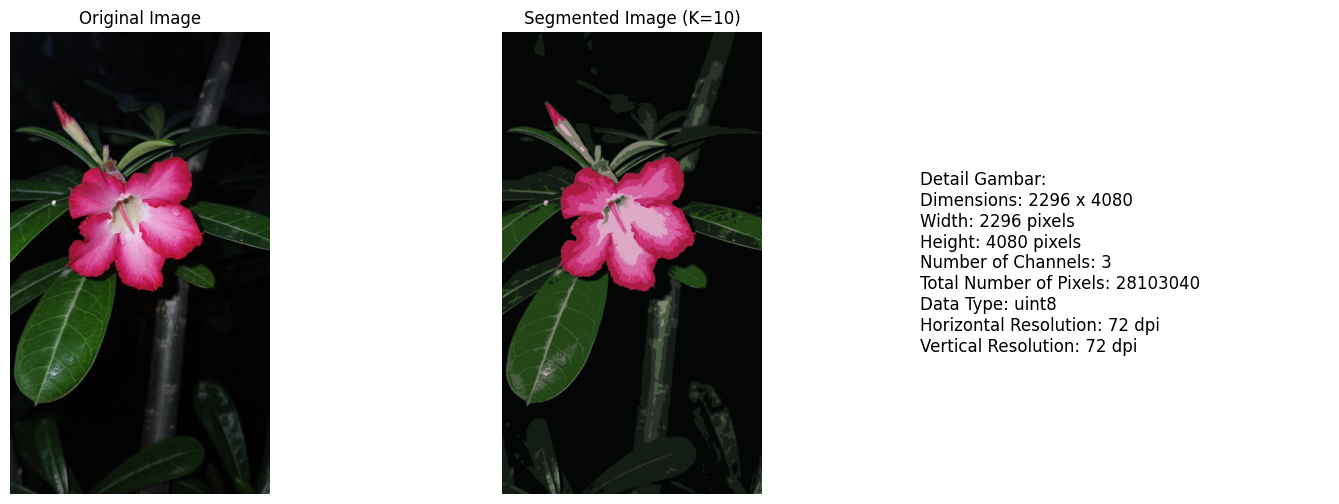

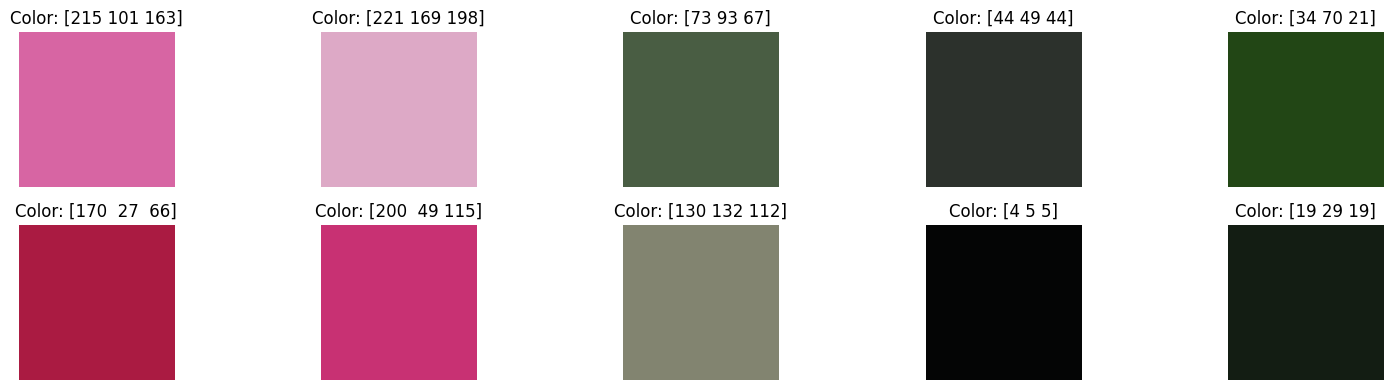

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Path ke gambar yang akan digunakan
image_path = 'kamboja.jpg'  # Ganti dengan path gambar Anda

# Membaca gambar
image = cv2.imread(image_path)

# Memeriksa apakah gambar berhasil dibaca
if image is None:
    raise FileNotFoundError(f"Image not found at path: {image_path}")

# Mengambil detail properties dari gambar
image_height, image_width, num_channels = image.shape
image_size = image.size
image_dtype = image.dtype

# Resolusi horizontal dan vertikal (misalkan 72 DPI sebagai contoh umum, Anda bisa mengganti dengan nilai aktual jika diketahui)
horizontal_resolution = 72  # DPI (Dots Per Inch)
vertical_resolution = 72    # DPI (Dots Per Inch)

# Ubah warna dari BGR ke RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Menampilkan gambar asli dan detail properties
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

details = (f"Detail Gambar:\n"
           f"Dimensions: {image_width} x {image_height}\n"
           f"Width: {image_width} pixels\n"
           f"Height: {image_height} pixels\n"
           f"Number of Channels: {num_channels}\n"
           f"Total Number of Pixels: {image_size}\n"
           f"Data Type: {image_dtype}\n"
           f"Horizontal Resolution: {horizontal_resolution} dpi\n"
           f"Vertical Resolution: {vertical_resolution} dpi")

ax[2].text(0, 0.5, details, fontsize=12, verticalalignment='center', horizontalalignment='left', wrap=True, transform=ax[2].transAxes)
ax[2].axis('off')

# Mengambil nilai piksel dalam bentuk matriks 2D dengan 3 nilai warna (RGB)
pixel_vals = image.reshape((-1, 3))

# Mengonversi tipe data piksel ke float32 untuk k-means
pixel_vals = np.float32(pixel_vals)

# Kriteria untuk berhenti dari algoritme k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# Meminta pengguna untuk memasukkan jumlah cluster
k = int(input("Masukkan jumlah cluster (k): "))

# Melakukan k-means clustering dengan jumlah cluster yang dipilih
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Mengonversi nilai pusat cluster menjadi 8-bit
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# Mengembalikan bentuk data ke bentuk asli gambar
segmented_image = segmented_data.reshape((image.shape))

# Menampilkan gambar yang telah di-segmentasi di subplot kedua
ax[1].imshow(segmented_image)
ax[1].set_title(f'Segmented Image (K={k})')
ax[1].axis('off')

plt.show()

# Menampilkan kotak warna untuk setiap pusat cluster dengan maksimal 5 kolom per baris
num_rows = (k + 4) // 5  # Hitung jumlah baris yang diperlukan
fig, ax = plt.subplots(num_rows, 5, figsize=(16, 2 * num_rows))

# Flattening axes for easier indexing
ax = ax.flatten()

for i, center in enumerate(centers):
    # Membuat kotak warna untuk setiap pusat cluster
    color_patch = np.zeros((50, 50, 3), dtype=np.uint8)
    color_patch[:, :, :] = center

    # Menampilkan kotak warna dan warna kode RGB di sekitarnya
    ax[i].imshow(color_patch)
    ax[i].set_title(f'Color: {center}')
    ax[i].axis('off')

# Menonaktifkan sumbu untuk subplot yang tidak digunakan
for j in range(i + 1, num_rows * 5):
    ax[j].axis('off')

plt.tight_layout()
plt.show()